## Problem I. Data Analytics
The task is to create a machine learning model that can evaluate the performance of
TA(Teaching Assistant) based on the Teaching Assistant Evaluation Dataset (Check the
attached “data.csv” file).
The data consist of evaluations of teaching performance over three regular semesters and two
summer semesters of 151 teaching assistant (TA) assignments at the Statistics Department of
the University of Wisconsin-Madison. The scores were divided into 3 roughly equal-sized
categories ("low", "medium", and "high"). For more details about the attributes check the
“data.names” file.
The first 5 columns are the features and the last column is the score. The model should be able
to classify the score(High, medium, or low) of TA based on the value of the first 5 columns.

Instructions:-
To create an ML model for evaluating teaching assistant performance, follow these steps:
1. Perform exploratory data analysis (EDA) using tools like pandas, numpy, and matplotlib.
2. Preprocess the data by cleaning, handling missing values, and transforming it into a suitable format for machine learning algorithms. Feature engineering can also be performed.
3. Split the preprocessed data into training and testing sets.
4. Select an appropriate multiclass classification algorithm such as logistic regression, SVM, or random forests. Train the algorithm on the training set and optimize hyperparameters using cross-validation.
5. Evaluate the trained model on the testing set using metrics such as accuracy, precision, recall, and F1-score.
6. Finally, the model should be saved in the local drive for future evaluation.

### Attribute Information:
  
   1. Whether or not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

#### Lets Import some Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [2]:
data = pd.read_csv("C:/Users/AKASH/Desktop/Fireblaze .AI/JOBS/PythonDeveloper_Hands_On_Assessment/data.csv", header=None)
data

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


#### Display top 5 rows

In [3]:
data.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


#### Display some samples

In [4]:
data.sample(5)

,0,1,2,3,4,5
86,2,23,3,1,20,3
59,2,25,7,2,27,2
113,2,8,3,2,27,1
79,1,13,3,1,17,3
147,2,10,3,2,12,1


#### Lets give data some meaningful column name

In [5]:
data.columns = ["Teaching Assistant", "Course Instructor", "Course", "Summer/Regular Semester", "Class Size", "Score"]
data

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


#### Lets check the information about the data
summary of its structure, including the number of rows and columns, column names, data types, and memory usage

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Teaching Assistant       151 non-null    int64
 1   Course Instructor        151 non-null    int64
 2   Course                   151 non-null    int64
 3   Summer/Regular Semester  151 non-null    int64
 4   Class Size               151 non-null    int64
 5   Score                    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


#### Lets see Statistical Summary of the data
provides various summary statistics for each column, such as count, mean, standard deviation, minimum, maximum, and quartiles.

In [7]:
data.describe()

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


#### Check wheather we have any zero values in our data 

In [8]:
data[data['Teaching Assistant']==0]

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score


In [9]:
data[data['Course Instructor']==0]

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score


In [10]:
data[data['Course']==0]

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score


In [11]:
data[data['Summer/Regular Semester']==0]

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score


In [12]:
data[data['Class Size']==0]

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score


#### Lets cross check the data with below provided details
   1. Whether or not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High


In [13]:
data['Teaching Assistant'].value_counts()

2    122
1     29
Name: Teaching Assistant, dtype: int64

In [14]:
data['Course Instructor'].value_counts() #this will show count for all individual values
len(data['Course Instructor'].unique())

25

In [15]:
data['Course'].value_counts()
len(data['Course'].unique())

26

In [16]:
data['Summer/Regular Semester'].value_counts()
len(data['Summer/Regular Semester'].unique())

2

In [17]:
data['Score'].value_counts()
len(data['Score'].unique())

3

#### Now to perform proper Analysis we need to understand the correlation between the data

In [18]:
x=data.corr()
x

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score
Teaching Assistant,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course Instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Summer/Regular Semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class Size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Score,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


<AxesSubplot:>

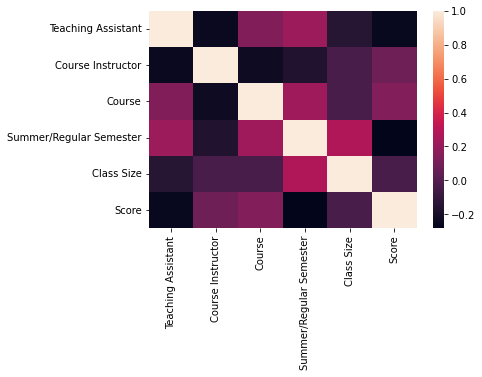

In [19]:
sns.heatmap(data=x)

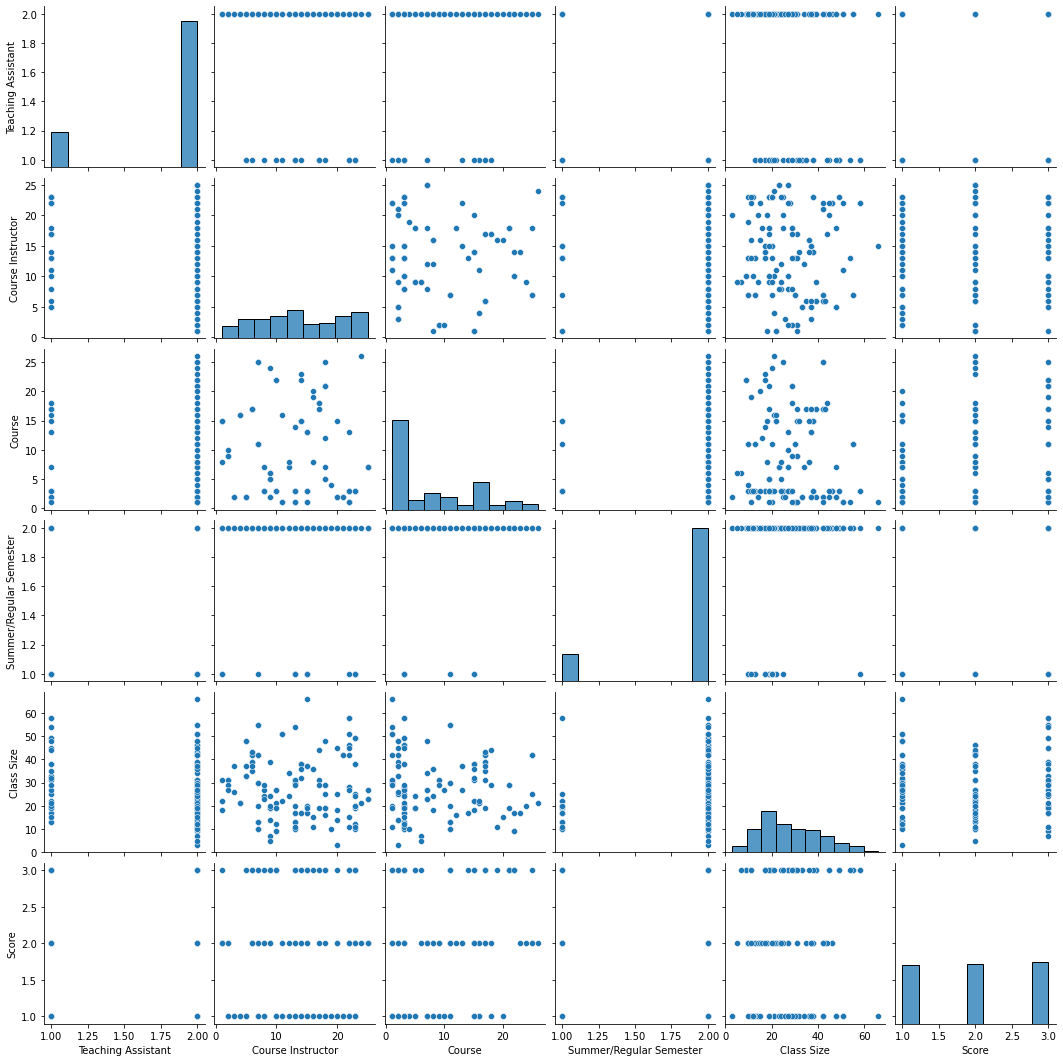

In [20]:
sns.pairplot(data)
plt.show()

#### Lets find out  'Non-English speaker' and 'English speaker' Teaching Assistant in data

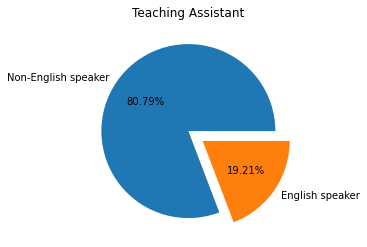

In [21]:
# plt.figure(figsize=(50,50))
labels = 'Non-English speaker', 'English speaker'
fig1, ax1 = plt.subplots()
ax1.pie(data['Teaching Assistant'].value_counts(), labels=labels,autopct='%0.02f%%',explode=[0,0.2])
ax1.set_title('Teaching Assistant')
plt.show()
# data['Teaching Assistant'].value_counts().plot(kind='pie',autopct='%0.02f%%',explode=[0,0.2])
# plt.show()

#### Lets find out what courses we have in summer and regular semester

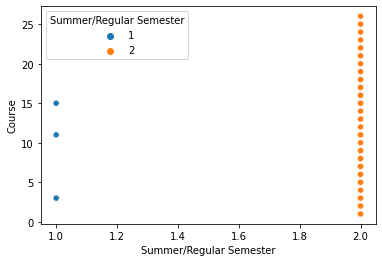

In [22]:
sns.scatterplot(data=data,x='Summer/Regular Semester',y='Course',hue='Summer/Regular Semester',palette=["C0", "C1"])
plt.show()

#### Score distribution over the semesters

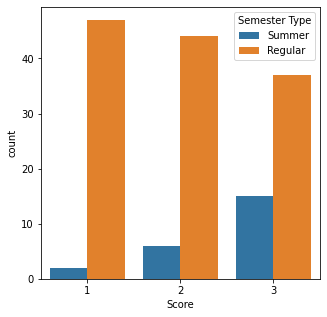

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='Score',hue='Summer/Regular Semester')
plt.legend(title='Semester Type',labels=['Summer', 'Regular'])
plt.show()

#### Lets create ML model by using multiclass classification algorithm

In [24]:
df=data

In [25]:
df

,Teaching Assistant,Course Instructor,Course,Summer/Regular Semester,Class Size,Score
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


#### Split the data into features and target 

In [26]:
from sklearn.model_selection import train_test_split
# Split the data into features and target
X = df.drop('Score', axis=1).values
# print(X)
y = df['Score'].values
# print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create the random forest classifier
Here's an explanation on why I chose the random forest algorithm over SVM and logistic regression for the given problem:

Random forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. In contrast, SVM and logistic regression are both linear models that make decisions based on a linear boundary.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=42)

#### Train the model

In [28]:
# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

print(y_pred)
print(y_test)

[1 2 2 1 1 1 3 2 2 2 3 3 1 3 2 1 1 1 2 3 1 3 2 3 1 3 1 1 1 1 2]
[1 2 3 3 1 1 3 2 2 3 3 3 1 3 2 2 1 1 2 2 1 3 2 2 3 1 1 1 2 1 2]


#### Evaluate Accuracy of model

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {}".format(accuracy))

Accuracy: 0.7096774193548387


#### Perform cross-validation to tune hyperparameters

In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to tune hyperparameters
scores = cross_val_score(rfc, X_train, y_train, cv=11)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Average accuracy: {}".format(scores.mean()))


Cross-validation scores: [0.54545455 0.54545455 0.81818182 0.54545455 0.63636364 0.54545455
 0.72727273 0.81818182 0.54545455 0.63636364 0.7       ]
Average accuracy: 0.6421487603305785


#### Save the model

In [31]:
import joblib
joblib.dump(rfc, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [32]:
# Load the trained model
# rfc = joblib.load('random_forest_model.pkl')

# Define the input features
input_features = [2,15,3,1,17] # Example input features

# Create a dataframe with the input features
input_df = pd.DataFrame([input_features])
        

# Use the trained model to predict the score
predicted_score = rfc.predict(input_df)

# Print the predicted score
print("Predicted score: {}".format(predicted_score[0]))

Predicted score: 3


#### Calculate precision, recall, and F1-score

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score ,classification_report ,confusion_matrix

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-score: {}".format(f1))

# Calculate Classification Report
print(classification_report(y_test,y_pred))

#Confusion matrix
confusion_matrix(y_test,y_pred)

Precision: 0.7108934971838197
Recall: 0.7096774193548387
F1-score: 0.7030360531309298
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.78      0.64      0.70        11
           3       0.62      0.56      0.59         9

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70        31
weighted avg       0.71      0.71      0.70        31



array([[10,  0,  1],
       [ 2,  7,  2],
       [ 2,  2,  5]], dtype=int64)

### Conclusion

1. Successfully performed EDA using tools like pandas, numpy, and matplotlib by handling redundant data.
2. Successfully Implemented multiclass classification algorithm such as Random Forests Regression.
3. Successfully optimized hyperparameters using cross-validation.
4. Successfully Evaluated the trained model on the testing set using metrics such as accuracy, precision,recall, and F1-score.
5. Finally, the model is saved in the local drive for future evaluation by file name : ['random_forest_model.pkl']

### Thank You